Populating the interactive namespace from numpy and matplotlib


C:\Users\diego2\AppData\Local\Temp/ipykernel_14876/3040796139.py:24: RuntimeWarning: invalid value encountered in power
  return t**(np.e-t)**2


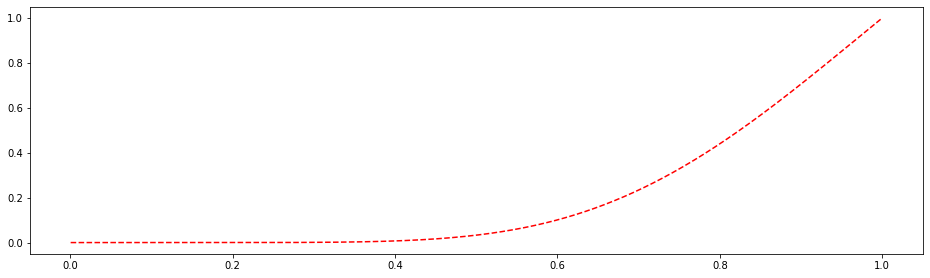

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

def M(t):
    bb = 2.5 * np.sin(2*np.pi*t)
    return bb
   
t1 = np.arange(0.0, 5.0, 0.5)
t2 = np.arange(0.0, 5.0, 0.05)
t3 = np.arange(0.01, .6, 0.05)

C = .1  #uFarads
Vb = 3.7  #volts
RC = np.linspace(-1,1,2000)
St = 12

def Q(t):
    """ Que corno es esto.."""
    #sv = C*Vb* [1-np.e**(-t/(RC))]
    return t**(np.e-t)**2

 
plt.figure(figsize=(16,10))
plt.subplot(211)
plt.plot(RC, Q(RC), 'r--')
plt.show()

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.


{1: '1', '1': 1, 2: '2', '2': 2, 0: '0', '0': 0}
* Circuito
R 1 2 1000
C 2 0 1e-06
V 0 1 type=vdc value=10 


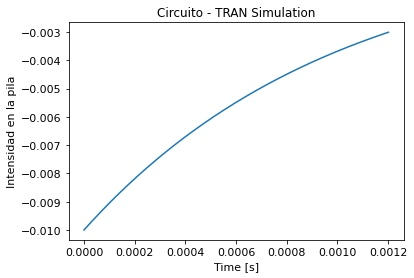

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
import schemdraw as SchemDraw
import schemdraw.elements as SchemDrawElement
import numpy as np
import ahkab
from ahkab import circuit, printing, time_functions
import pylab as plt

esquematico = SchemDraw.Drawing(unit=3)
V = esquematico.add(SchemDrawElement.SOURCE_V, label='V (10V)')
R = esquematico.add(SchemDrawElement.RES, d='right', label='R (100K$\Omega$)')
esquematico.add(SchemDrawElement.CAP, d='down', botlabel='C (0.1$\mu$F)')
esquematico.add(SchemDrawElement.LINE, to=V.start)
esquematico.add(SchemDrawElement.GND)
esquematico.draw()
esquematico.save('schematic.jpg')

{1: '1', '1': 1, 2: '2', '2': 2, 0: '0', '0': 0}
* Circuito
R 1 2 1000
C 2 0 1e-06
V 0 1 type=vdc value=2 


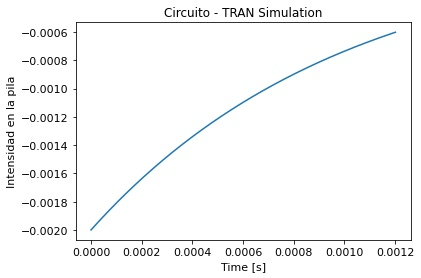

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
import numpy as np
import ahkab
from ahkab import circuit, printing, time_functions
import pylab as plt

circuito = circuit.Circuit(title="Circuito")
gnd = circuito.get_ground_node()

circuito.add_resistor("R", n1="1", n2="2", value=1000)

circuito.add_capacitor("C", n1="2", n2=gnd, value=1e-6)

circuito.add_vsource("V", n1=gnd, n2="1", dc_value=3.31)

print(circuito.nodes_dict)
print(circuito)

tran_analysis = ahkab.new_tran(tstart=0, tstop=1.2e-3, tstep=1e-6, x0=None)
r = ahkab.run(circuito, an_list=[tran_analysis])

fig = plt.figure()
plt.title(circuito.title + " - TRAN Simulation")
plt.plot(r['tran']['T'], r['tran']['I(V)'], label="Voltaje en el condensador")
plt.ylabel('Intensidad en la pila')
plt.xlabel('Time [s]')
plt.show()